In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import hjb_modified, hjb_modified_jump
from numba import njit

Equation with damage function $j$:

\begin{align}
0 = \max_e \min_{h_2} &-\delta \phi(y,z_2) + \delta\eta\log e  + \frac{\partial \phi}{\partial y}(y, z_2) z_2 e\\
&+ \left[\frac{\partial \phi}{\partial z_2}(y, z_2)\right]\left[-\rho(z_2 -  \mu_{2}) \right] + \left[\frac{\partial^2 \phi}{\partial (z_2)^2}(y, z_2)\right]\left(\frac{z_2|\sigma_2|^2}{2}\right)\\
& + (\eta-1)\left(\frac{d}{d \tau}\Lambda(y)z_2 e\right) + \frac{1}{\sqrt{2\pi}\sigma}\exp\{-\frac{(\bar{y}-y)^2}{2\sigma^2}\} \left[\bar{\phi}(y, z_2)-\phi(y, z_2)\right]\\
\end{align}

where

\begin{equation}
\Lambda_j(\tau)=
\begin{cases}
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2, & \tau\leq \bar{\tau} \\
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2 + \frac{\lambda_{2}^+}{2}(\tau-\bar{\tau})^2, & \tau > \bar{\tau}
\end{cases}
\end{equation}

FOC of $e$ gives :

$$
e^* = -\frac{\delta \eta}{\frac{\partial \phi}{\partial y}(y, z_2)z_2 + (\eta-1)\frac{d}{d \tau}\Lambda(y)z_2}
$$

In [2]:
# Model parameters
η = .032
δ = .01
# Z process
μ_2 = 1.86/1000.
ρ = 0.9
σ_2 = np.sqrt(2*ρ/10416.29)
# Damage setting
λ_1 = 1.7675/10000
λ_2 = 0.0022*2
λ_bar = 2.

# Three damages
# λ_2p_state = np.array([0., 0.0197*2, 0.3853*2])
# λ_2p_prior = np.array([0.4875, 0.4875, 0.025])

# Two damages
λ_2p_state = np.array([0., 0.0197*2])
λ_2p_prior = np.array([0.5, 0.5])

In [3]:
# Grid setting
n_z = 50
z_min = np.max([μ_2 - 3*np.sqrt(σ_2**2*μ_2/(2*ρ)), 1e-9])
z_max = μ_2 + 3*np.sqrt(σ_2**2*μ_2/(2*ρ))
z_grid = np.linspace(z_min, z_max, n_z)

n_y = 50
y_min = 1e-10
y_max = 10
y_grid = np.linspace(y_min, y_max, n_y)

# Solve for each damage function
ϕ_state = []
for λ_2p in λ_2p_state:
    pde_paras = (η, δ, μ_2, ρ, σ_2, λ_1, λ_2, λ_bar, λ_2p)
    ϕ, _ = hjb_modified(z_grid, y_grid, model_paras=pde_paras, v0=None,
                           ϵ=.5, tol=1e-8, max_iter=10_000, use_python=False)
    ϕ_state.append(ϕ)

Iteration 1: LHS Error: 0.0014451636931586175; RHS Error 0.0018258099200731002
Iteration 2: LHS Error: 0.0013253543476743146; RHS Error 0.0015870510036186374
Iteration 3: LHS Error: 0.0012482704125546988; RHS Error 0.0014338404731752126
Iteration 4: LHS Error: 0.0011919968102455727; RHS Error 0.0013251680285864985
Iteration 5: LHS Error: 0.0011463650826926911; RHS Error 0.0012429991770910576
Iteration 6: LHS Error: 0.001106890818966558; RHS Error 0.0011781268841306283
Iteration 7: LHS Error: 0.0010717802370126686; RHS Error 0.0011254127938292787
Iteration 8: LHS Error: 0.0010403166598284466; RHS Error 0.001081709804926243
Iteration 9: LHS Error: 0.0010120952315285595; RHS Error 0.0010448916766797565
Iteration 10: LHS Error: 0.0009867494804204398; RHS Error 0.0010134107520711072
Iteration 11: LHS Error: 0.0009639026675789808; RHS Error 0.0009860979719144083
Iteration 12: LHS Error: 0.0009431883169921055; RHS Error 0.000962061237849201
Iteration 13: LHS Error: 0.0009242746676678872; RHS 

Iteration 105: LHS Error: 0.0003793292846493018; RHS Error 0.00038027923056150025
Iteration 106: LHS Error: 0.00037651439129725295; RHS Error 0.000377451057334373
Iteration 107: LHS Error: 0.00037372632953201756; RHS Error 0.00037464998352238735
Iteration 108: LHS Error: 0.000370964711169125; RHS Error 0.00037187561317372563
Iteration 109: LHS Error: 0.00036822915734066597; RHS Error 0.0003691275590381349
Iteration 110: LHS Error: 0.0003655192974488797; RHS Error 0.00036640544558134394
Iteration 111: LHS Error: 0.0003628347698018536; RHS Error 0.00036370890135235936
Iteration 112: LHS Error: 0.0003601752209067277; RHS Error 0.00036103757003419853
Iteration 113: LHS Error: 0.00035754030493849454; RHS Error 0.00035839109732343507
Iteration 114: LHS Error: 0.0003549296831463905; RHS Error 0.0003557691394616547
Iteration 115: LHS Error: 0.000352343024746557; RHS Error 0.00035317135865913375
Iteration 116: LHS Error: 0.000349780006182257; RHS Error 0.0003505974255351344
Iteration 117: LHS E

Iteration 209: LHS Error: 0.00018472153560329663; RHS Error 0.00018501551975681828
Iteration 210: LHS Error: 0.00018351323517785956; RHS Error 0.0001838044406398087
Iteration 211: LHS Error: 0.00018231367566980128; RHS Error 0.0001826021336610457
Iteration 212: LHS Error: 0.00018112278043114216; RHS Error 0.00018140851830670103
Iteration 213: LHS Error: 0.00017994047640955413; RHS Error 0.0001802235289886866
Iteration 214: LHS Error: 0.00017876668714406074; RHS Error 0.00017904708092738252
Iteration 215: LHS Error: 0.0001776013411509264; RHS Error 0.0001778791127167263
Iteration 216: LHS Error: 0.00017644436722853707; RHS Error 0.000176719543446515
Iteration 217: LHS Error: 0.0001752956952924961; RHS Error 0.00017556830376836688
Iteration 218: LHS Error: 0.0001741552529010565; RHS Error 0.0001744253263674401
Iteration 219: LHS Error: 0.00017302297166052472; RHS Error 0.00017329053925439362
Iteration 220: LHS Error: 0.00017189878335803488; RHS Error 0.00017216387382904897
Iteration 221:

Iteration 314: LHS Error: 9.456979780012031e-05; RHS Error 9.468797580909584e-05
Iteration 315: LHS Error: 9.398275964898894e-05; RHS Error 9.409999076613e-05
Iteration 316: LHS Error: 9.339957328070858e-05; RHS Error 9.351586606798845e-05
Iteration 317: LHS Error: 9.282021311436683e-05; RHS Error 9.293557597071594e-05
Iteration 318: LHS Error: 9.224464978303815e-05; RHS Error 9.235909170939613e-05
Iteration 319: LHS Error: 9.167285808341086e-05; RHS Error 9.178638638544507e-05
Iteration 320: LHS Error: 9.110480908228191e-05; RHS Error 9.121743431922077e-05
Iteration 321: LHS Error: 9.05404775511931e-05; RHS Error 9.065220443641863e-05
Iteration 322: LHS Error: 8.99798364907417e-05; RHS Error 9.009067499749651e-05
Iteration 323: LHS Error: 8.942285933992433e-05; RHS Error 8.953281951116956e-05
Iteration 324: LHS Error: 8.886952022721384e-05; RHS Error 8.897860833068788e-05
Iteration 325: LHS Error: 8.831979285997549e-05; RHS Error 8.842801663185127e-05
Iteration 326: LHS Error: 8.77736

Iteration 422: LHS Error: 4.879908017940693e-05; RHS Error 4.885081156239359e-05
Iteration 423: LHS Error: 4.850523421486008e-05; RHS Error 4.855658819065151e-05
Iteration 424: LHS Error: 4.821322295552044e-05; RHS Error 4.826420324474255e-05
Iteration 425: LHS Error: 4.792303373896134e-05; RHS Error 4.797364057701633e-05
Iteration 426: LHS Error: 4.763465426928237e-05; RHS Error 4.7684898108811265e-05
Iteration 427: LHS Error: 4.734807288729603e-05; RHS Error 4.739794768078207e-05
Iteration 428: LHS Error: 4.7063277717529495e-05; RHS Error 4.71127909715879e-05
Iteration 429: LHS Error: 4.6780257135975445e-05; RHS Error 4.68294094460313e-05
Iteration 430: LHS Error: 4.64989993624737e-05; RHS Error 4.654779626630395e-05
Iteration 431: LHS Error: 4.621949285409099e-05; RHS Error 4.626793361994081e-05
Iteration 432: LHS Error: 4.594172617485015e-05; RHS Error 4.598981586387187e-05
Iteration 433: LHS Error: 4.566568784114544e-05; RHS Error 4.571343103845706e-05
Iteration 434: LHS Error: 4.

Iteration 529: LHS Error: 2.5742327005626175e-05; RHS Error 2.576663922805101e-05
Iteration 530: LHS Error: 2.5590331703281843e-05; RHS Error 2.5614502635875713e-05
Iteration 531: LHS Error: 2.5439267524143827e-05; RHS Error 2.546325738017987e-05
Iteration 532: LHS Error: 2.528911859148164e-05; RHS Error 2.531295077115559e-05
Iteration 533: LHS Error: 2.5139880003438586e-05; RHS Error 2.5163552386105854e-05
Iteration 534: LHS Error: 2.4991544741920224e-05; RHS Error 2.5015053910198547e-05
Iteration 535: LHS Error: 2.4844106499624652e-05; RHS Error 2.4867455997896592e-05
Iteration 536: LHS Error: 2.4697559905223487e-05; RHS Error 2.472074952049601e-05
Iteration 537: LHS Error: 2.4551899566224722e-05; RHS Error 2.4574933038133163e-05
Iteration 538: LHS Error: 2.4407119543240485e-05; RHS Error 2.4429994973453203e-05
Iteration 539: LHS Error: 2.4263215012726436e-05; RHS Error 2.4285933556904065e-05
Iteration 540: LHS Error: 2.41201801222668e-05; RHS Error 2.4142744996658114e-05
Iteration 5

Iteration 630: LHS Error: 1.4213695311612873e-05; RHS Error 1.4226017690039425e-05
Iteration 631: LHS Error: 1.4130891254918176e-05; RHS Error 1.4143131976324498e-05
Iteration 632: LHS Error: 1.4048578985334514e-05; RHS Error 1.406073930674775e-05
Iteration 633: LHS Error: 1.3966755503386219e-05; RHS Error 1.39788352084445e-05
Iteration 634: LHS Error: 1.3885417828013447e-05; RHS Error 1.3897418355088439e-05
Iteration 635: LHS Error: 1.3804562992408842e-05; RHS Error 1.3816484033873032e-05
Iteration 636: LHS Error: 1.3724188050415198e-05; RHS Error 1.3736030915181309e-05
Iteration 637: LHS Error: 1.3644290079939392e-05; RHS Error 1.3656054244979838e-05
Iteration 638: LHS Error: 1.3564866217036231e-05; RHS Error 1.3576554765430703e-05
Iteration 639: LHS Error: 1.3485913474289846e-05; RHS Error 1.349752448920956e-05
Iteration 640: LHS Error: 1.3407429046582986e-05; RHS Error 1.3418962967018367e-05
Iteration 641: LHS Error: 1.33294100792547e-05; RHS Error 1.3340868411665851e-05
Iteration 

Iteration 732: LHS Error: 7.856966644265162e-06; RHS Error 7.8633059145825e-06
Iteration 733: LHS Error: 7.811660350978689e-06; RHS Error 7.817959313931267e-06
Iteration 734: LHS Error: 7.766619267227104e-06; RHS Error 7.77287768849856e-06
Iteration 735: LHS Error: 7.721841804142482e-06; RHS Error 7.72806060805745e-06
Iteration 736: LHS Error: 7.67732638243257e-06; RHS Error 7.683504974817577e-06
Iteration 737: LHS Error: 7.633071452142759e-06; RHS Error 7.653950366813718e-06
Iteration 738: LHS Error: 7.589075440628257e-06; RHS Error 7.697105158085884e-06
Iteration 739: LHS Error: 7.545336808828518e-06; RHS Error 7.740008017544098e-06
Iteration 740: LHS Error: 7.501854024344334e-06; RHS Error 7.782662775942866e-06
Iteration 741: LHS Error: 7.458625554596088e-06; RHS Error 7.825066572090655e-06
Iteration 742: LHS Error: 7.415649882991371e-06; RHS Error 7.867223194342509e-06
Iteration 743: LHS Error: 7.372925482057591e-06; RHS Error 7.90913419469394e-06
Iteration 744: LHS Error: 7.330450

Iteration 833: LHS Error: 4.391553114532765e-06; RHS Error 1.0834927634857314e-05
Iteration 834: LHS Error: 4.36642855386471e-06; RHS Error 1.0859593959673328e-05
Iteration 835: LHS Error: 4.341449544947862e-06; RHS Error 1.0884119085059806e-05
Iteration 836: LHS Error: 4.3166152942503144e-06; RHS Error 1.0908500544770574e-05
Iteration 837: LHS Error: 4.291924534188807e-06; RHS Error 1.0932742659592633e-05
Iteration 838: LHS Error: 4.26737678635436e-06; RHS Error 1.0956845106324014e-05
Iteration 839: LHS Error: 4.2429711111929835e-06; RHS Error 1.0980806610696916e-05
Iteration 840: LHS Error: 4.218706689262941e-06; RHS Error 1.100462997572502e-05
Iteration 841: LHS Error: 4.194582688077375e-06; RHS Error 1.1028317422869405e-05
Iteration 842: LHS Error: 4.170598255137659e-06; RHS Error 1.1051865562303025e-05
Iteration 843: LHS Error: 4.146752592568137e-06; RHS Error 1.1075279455547826e-05
Iteration 844: LHS Error: 4.123044999568282e-06; RHS Error 1.1098556915600626e-05
Iteration 845: LH

Iteration 938: LHS Error: 2.4091578195301055e-06; RHS Error 1.278181031464363e-05
Iteration 939: LHS Error: 2.395459142823242e-06; RHS Error 1.2795270453103613e-05
Iteration 940: LHS Error: 2.3818391648167125e-06; RHS Error 1.2808653410480457e-05
Iteration 941: LHS Error: 2.3682974687744274e-06; RHS Error 1.2821959578003528e-05
Iteration 942: LHS Error: 2.3548336292034122e-06; RHS Error 1.28351893676883e-05
Iteration 943: LHS Error: 2.3414472150595778e-06; RHS Error 1.2848343185742394e-05
Iteration 944: LHS Error: 2.3281377908579426e-06; RHS Error 1.2861421482672844e-05
Iteration 945: LHS Error: 2.314904917199989e-06; RHS Error 1.2874424664221932e-05
Iteration 946: LHS Error: 2.301748154534544e-06; RHS Error 1.288735317390619e-05
Iteration 947: LHS Error: 2.2886670593275094e-06; RHS Error 1.2900207425155545e-05
Iteration 948: LHS Error: 2.2756611661178816e-06; RHS Error 1.2912987864463531e-05
Iteration 949: LHS Error: 2.2627300839683784e-06; RHS Error 1.2925694615914269e-05
Iteration 9

Iteration 1038: LHS Error: 1.3643118672995724e-06; RHS Error 1.38087835640894e-05
Iteration 1039: LHS Error: 1.3565950834348861e-06; RHS Error 1.381637085134382e-05
Iteration 1040: LHS Error: 1.3489222857460126e-06; RHS Error 1.3823914946433768e-05
Iteration 1041: LHS Error: 1.3412932193396232e-06; RHS Error 1.3831416078045888e-05
Iteration 1042: LHS Error: 1.3337076328195918e-06; RHS Error 1.3838874496546532e-05
Iteration 1043: LHS Error: 1.326165274220803e-06; RHS Error 1.3846290458436033e-05
Iteration 1044: LHS Error: 1.318665895130855e-06; RHS Error 1.3853664191422e-05
Iteration 1045: LHS Error: 1.3112089636974078e-06; RHS Error 1.3860995941108751e-05
Iteration 1046: LHS Error: 1.3037946323679606e-06; RHS Error 1.386828547564941e-05
Iteration 1047: LHS Error: 1.2964228501000097e-06; RHS Error 1.3875532777635159e-05
Iteration 1048: LHS Error: 1.2890930737863293e-06; RHS Error 1.3882739656950055e-05
Iteration 1049: LHS Error: 1.2818050157403782e-06; RHS Error 1.3889905796502693e-05
I

Iteration 1145: LHS Error: 7.44547617087532e-07; RHS Error 1.441829685281705e-05
Iteration 1146: LHS Error: 7.403535085687141e-07; RHS Error 1.4422422407293217e-05
Iteration 1147: LHS Error: 7.361834128694067e-07; RHS Error 1.4426524604180735e-05
Iteration 1148: LHS Error: 7.320370209451532e-07; RHS Error 1.4430603455207634e-05
Iteration 1149: LHS Error: 7.279141041871551e-07; RHS Error 1.4434659255706033e-05
Iteration 1150: LHS Error: 7.238147676641438e-07; RHS Error 1.4438692113171543e-05
Iteration 1151: LHS Error: 7.197386312357557e-07; RHS Error 1.4442700927972275e-05
Iteration 1152: LHS Error: 7.156850204276255e-07; RHS Error 1.4446689280475569e-05
Iteration 1153: LHS Error: 7.116547144914165e-07; RHS Error 1.4450654203111875e-05
Iteration 1154: LHS Error: 7.076472731681882e-07; RHS Error 1.44545966033029e-05
Iteration 1155: LHS Error: 7.036625334910784e-07; RHS Error 1.4458516626725086e-05
Iteration 1156: LHS Error: 6.997003701991744e-07; RHS Error 1.446241442154485e-05
Iteration

Iteration 1256: LHS Error: 3.9815702472523196e-07; RHS Error 1.4759112408434596e-05
Iteration 1257: LHS Error: 3.9594655909525045e-07; RHS Error 1.4761312543233986e-05
Iteration 1258: LHS Error: 3.937001906290094e-07; RHS Error 1.4763496066127514e-05
Iteration 1259: LHS Error: 3.9150695169132277e-07; RHS Error 1.476567423145574e-05
Iteration 1260: LHS Error: 3.894530892223358e-07; RHS Error 1.4767834368941508e-05
Iteration 1261: LHS Error: 3.871948912048673e-07; RHS Error 1.4769965291354208e-05
Iteration 1262: LHS Error: 3.8497945277493617e-07; RHS Error 1.4772100644800572e-05
Iteration 1263: LHS Error: 3.827966740949096e-07; RHS Error 1.4774229379347715e-05
Iteration 1264: LHS Error: 3.806369267139731e-07; RHS Error 1.4776346086547206e-05
Iteration 1265: LHS Error: 3.7849528443378855e-07; RHS Error 1.4778449746925262e-05
Iteration 1266: LHS Error: 3.7636980664002007e-07; RHS Error 1.4780540635363779e-05
Iteration 1267: LHS Error: 3.742578563725729e-07; RHS Error 1.478261918745876e-05


Iteration 1358: LHS Error: 2.243669558060768e-07; RHS Error 1.4930141921440767e-05
Iteration 1359: LHS Error: 2.231093396837247e-07; RHS Error 1.4931379853550452e-05
Iteration 1360: LHS Error: 2.2185874812286066e-07; RHS Error 1.4932610875628997e-05
Iteration 1361: LHS Error: 2.2061514018401063e-07; RHS Error 1.4933835019843161e-05
Iteration 1362: LHS Error: 2.1937848744546518e-07; RHS Error 1.4935052328002383e-05
Iteration 1363: LHS Error: 2.1814875499071018e-07; RHS Error 1.4936262824039774e-05
Iteration 1364: LHS Error: 2.169259059880968e-07; RHS Error 1.4937466541375434e-05
Iteration 1365: LHS Error: 2.157099088240244e-07; RHS Error 1.4938663522116955e-05
Iteration 1366: LHS Error: 2.145007275411448e-07; RHS Error 1.4939853798211873e-05
Iteration 1367: LHS Error: 2.1329832973482343e-07; RHS Error 1.4941037403892353e-05
Iteration 1368: LHS Error: 2.121026817375471e-07; RHS Error 1.494221437030709e-05
Iteration 1369: LHS Error: 2.1091374316495326e-07; RHS Error 1.494338472782155e-05


Iteration 1464: LHS Error: 1.2371769959884649e-07; RHS Error 1.5029236739680114e-05
Iteration 1465: LHS Error: 1.2302535391806035e-07; RHS Error 1.5029918364887346e-05
Iteration 1466: LHS Error: 1.2233689648810664e-07; RHS Error 1.5030596186099482e-05
Iteration 1467: LHS Error: 1.2165227861182792e-07; RHS Error 1.5031270191009092e-05
Iteration 1468: LHS Error: 1.2097150604850615e-07; RHS Error 1.5031940439971326e-05
Iteration 1469: LHS Error: 1.2029455113971022e-07; RHS Error 1.5032606936418117e-05
Iteration 1470: LHS Error: 1.1962156076794628e-07; RHS Error 1.5033269681965578e-05
Iteration 1471: LHS Error: 1.1895198563649512e-07; RHS Error 1.5033929005816085e-05
Iteration 1472: LHS Error: 1.1828631453492111e-07; RHS Error 1.5034584607120233e-05
Iteration 1473: LHS Error: 1.1762440907392424e-07; RHS Error 1.5035236329587242e-05
Iteration 1474: LHS Error: 1.1696622341517138e-07; RHS Error 1.5035884366738526e-05
Iteration 1475: LHS Error: 1.1631171618897707e-07; RHS Error 1.5036528746685

Iteration 1575: LHS Error: 6.635032374913141e-08; RHS Error 1.5085790156829041e-05
Iteration 1576: LHS Error: 6.59791777046781e-08; RHS Error 1.5086155155118663e-05
Iteration 1577: LHS Error: 6.56101001722531e-08; RHS Error 1.508651813045595e-05
Iteration 1578: LHS Error: 6.524307973043708e-08; RHS Error 1.5086879073150303e-05
Iteration 1579: LHS Error: 6.487810526312199e-08; RHS Error 1.5087238010494126e-05
Iteration 1580: LHS Error: 6.45151654182774e-08; RHS Error 1.5087594935669522e-05
Iteration 1581: LHS Error: 6.415424867733943e-08; RHS Error 1.5087949882447438e-05
Iteration 1582: LHS Error: 6.379534392420005e-08; RHS Error 1.5088302844063753e-05
Iteration 1583: LHS Error: 6.343844104195195e-08; RHS Error 1.5088653831554777e-05
Iteration 1584: LHS Error: 6.308352791528637e-08; RHS Error 1.5089002868328219e-05
Iteration 1585: LHS Error: 6.273059406647352e-08; RHS Error 1.5089349958443115e-05
Iteration 1586: LHS Error: 6.23796290177836e-08; RHS Error 1.5089695112300216e-05
Iteration

Iteration 1693: LHS Error: 3.421207565856843e-08; RHS Error 1.5117595277668776e-05
Iteration 1694: LHS Error: 3.4020943270873794e-08; RHS Error 1.5117782155664276e-05
Iteration 1695: LHS Error: 3.383099526910183e-08; RHS Error 1.5117967800400405e-05
Iteration 1696: LHS Error: 3.3642205160555605e-08; RHS Error 1.511815235065309e-05
Iteration 1697: LHS Error: 3.3454466988325215e-08; RHS Error 1.5118335877605405e-05
Iteration 1698: LHS Error: 3.3267747723275676e-08; RHS Error 1.5118518424698732e-05
Iteration 1699: LHS Error: 3.308204482577182e-08; RHS Error 1.5118699984476361e-05
Iteration 1700: LHS Error: 3.28973564084345e-08; RHS Error 1.5118880566852887e-05
Iteration 1701: LHS Error: 3.271368030632882e-08; RHS Error 1.5119060157028083e-05
Iteration 1702: LHS Error: 3.2531011745495775e-08; RHS Error 1.5119238754081462e-05
Iteration 1703: LHS Error: 3.234934746465523e-08; RHS Error 1.511941637814384e-05
Iteration 1704: LHS Error: 3.216868080246904e-08; RHS Error 1.5119593018123826e-05
It

Iteration 1802: LHS Error: 1.853743371305061e-08; RHS Error 1.5132930351199241e-05
Iteration 1803: LHS Error: 1.843439149940007e-08; RHS Error 1.5133035689480307e-05
Iteration 1804: LHS Error: 1.8329791490190317e-08; RHS Error 1.5133136445106155e-05
Iteration 1805: LHS Error: 1.822677091201097e-08; RHS Error 1.5133235599169804e-05
Iteration 1806: LHS Error: 1.8124345663173003e-08; RHS Error 1.5133335332575583e-05
Iteration 1807: LHS Error: 1.8022586076305025e-08; RHS Error 1.5133434452105007e-05
Iteration 1808: LHS Error: 1.792161664904146e-08; RHS Error 1.5133533146517459e-05
Iteration 1809: LHS Error: 1.7820525111122976e-08; RHS Error 1.5133631826205578e-05
Iteration 1810: LHS Error: 1.772127222743336e-08; RHS Error 1.5133730224565784e-05
Iteration 1811: LHS Error: 1.7621259534861267e-08; RHS Error 1.513382666410031e-05
Iteration 1812: LHS Error: 1.7521775821927044e-08; RHS Error 1.5133921790825601e-05
Iteration 1813: LHS Error: 1.742361589729402e-08; RHS Error 1.5134018095424012e-05

Iteration 1: LHS Error: 0.0014451636894532152; RHS Error 0.0018258099200916273
Iteration 2: LHS Error: 0.00132535433015969; RHS Error 0.001587051000266535
Iteration 3: LHS Error: 0.001248270352639432; RHS Error 0.0014338404616424597
Iteration 4: LHS Error: 0.0011919966610592853; RHS Error 0.001325167988901215
Iteration 5: LHS Error: 0.0011463647700643217; RHS Error 0.0012429990741832306
Iteration 6: LHS Error: 0.0011068902291186972; RHS Error 0.0011781266513108274
Iteration 7: LHS Error: 0.0010717792048770113; RHS Error 0.0011254123269658694
Iteration 8: LHS Error: 0.0010403149506914029; RHS Error 0.0010817089478720415
Iteration 9: LHS Error: 0.0010120925123478595; RHS Error 0.0010448901945031026
Iteration 10: LHS Error: 0.0009867452898320948; RHS Error 0.0010134083186959413
Iteration 11: LHS Error: 0.0009638964152275716; RHS Error 0.0009860941443800273
Iteration 12: LHS Error: 0.0009431792214120958; RHS Error 0.0009620554223382557
Iteration 13: LHS Error: 0.0009242617477910938; RHS Er

Iteration 104: LHS Error: 0.000356161144582548; RHS Error 0.00035766923514383254
Iteration 105: LHS Error: 0.00035291428644061706; RHS Error 0.00035440744535163805
Iteration 106: LHS Error: 0.00034969805821739863; RHS Error 0.00035117645526146256
Iteration 107: LHS Error: 0.00034651214694797483; RHS Error 0.00034797594617866524
Iteration 108: LHS Error: 0.0003433562447183597; RHS Error 0.0003448056064134403
Iteration 109: LHS Error: 0.00034023004669941903; RHS Error 0.000341665136217755
Iteration 110: LHS Error: 0.0003371332524343129; RHS Error 0.0003385542265532088
Iteration 111: LHS Error: 0.0003340655658382874; RHS Error 0.00033547257709737435
Iteration 112: LHS Error: 0.00033102669287898845; RHS Error 0.00033241989777370757
Iteration 113: LHS Error: 0.0003280163448848711; RHS Error 0.00032939589046975074
Iteration 114: LHS Error: 0.0003250342351751867; RHS Error 0.00032640027116852965
Iteration 115: LHS Error: 0.00032208008159741175; RHS Error 0.00032343275597554824
Iteration 116: 

Iteration 211: LHS Error: 0.0001774418480495754; RHS Error 0.00018289053400360181
Iteration 212: LHS Error: 0.00017656470502733224; RHS Error 0.0001820134208221299
Iteration 213: LHS Error: 0.00017569189744655322; RHS Error 0.00018114064245357758
Iteration 214: LHS Error: 0.00017482340080714198; RHS Error 0.0001802721784953479
Iteration 215: LHS Error: 0.00017395919460051756; RHS Error 0.00017940800360521095
Iteration 216: LHS Error: 0.00017309926415749743; RHS Error 0.0001785481133438701
Iteration 217: LHS Error: 0.00017224358336165313; RHS Error 0.0001776924632135802
Iteration 218: LHS Error: 0.00017139213434695655; RHS Error 0.00017684104518009806
Iteration 219: LHS Error: 0.00017054491533638472; RHS Error 0.0001759938331653117
Iteration 220: LHS Error: 0.00016970184208989214; RHS Error 0.00017515081261308254
Iteration 221: LHS Error: 0.00016886295071970314; RHS Error 0.00017431193677945372
Iteration 222: LHS Error: 0.0001680282152902446; RHS Error 0.00017347722919099496
Iteration 2

Iteration 311: LHS Error: 0.00010810183214340907; RHS Error 0.00011355277481380792
Iteration 312: LHS Error: 0.0001075674200518989; RHS Error 0.00011301838057229242
Iteration 313: LHS Error: 0.00010703565016623173; RHS Error 0.0001124866274780847
Iteration 314: LHS Error: 0.00010650650832454145; RHS Error 0.00011195750341923604
Iteration 315: LHS Error: 0.00010597998210491733; RHS Error 0.00011143099462945597
Iteration 316: LHS Error: 0.0001054560585014852; RHS Error 0.00011090708825649089
Iteration 317: LHS Error: 0.00010493472442371643; RHS Error 0.00011038577161475105
Iteration 318: LHS Error: 0.00010441596790691787; RHS Error 0.00010986703149914129
Iteration 319: LHS Error: 0.00010389977492264446; RHS Error 0.00010935085607485905
Iteration 320: LHS Error: 0.00010338613411789432; RHS Error 0.00010883723162244013
Iteration 321: LHS Error: 0.00010287503158878941; RHS Error 0.0001083261463241384
Iteration 322: LHS Error: 0.00010236645584618675; RHS Error 0.00010781758684984254
Iteratio

Iteration 414: LHS Error: 6.488422862591103e-05; RHS Error 7.033656209039083e-05
Iteration 415: LHS Error: 6.456344434586925e-05; RHS Error 7.001579331893316e-05
Iteration 416: LHS Error: 6.424424725282041e-05; RHS Error 6.969660995628606e-05
Iteration 417: LHS Error: 6.392663054684278e-05; RHS Error 6.937900356077803e-05
Iteration 418: LHS Error: 6.36105741552151e-05; RHS Error 6.906297181889106e-05
Iteration 419: LHS Error: 6.32960945178146e-05; RHS Error 6.87485002949808e-05
Iteration 420: LHS Error: 6.298319368873428e-05; RHS Error 6.843557840721204e-05
Iteration 421: LHS Error: 6.267177286568837e-05; RHS Error 6.812418992013713e-05
Iteration 422: LHS Error: 6.236195727624128e-05; RHS Error 6.781436948063619e-05
Iteration 423: LHS Error: 6.20536166158897e-05; RHS Error 6.750605587699192e-05
Iteration 424: LHS Error: 6.174682639116524e-05; RHS Error 6.719929006627888e-05
Iteration 425: LHS Error: 6.144155293365261e-05; RHS Error 6.689402866421945e-05
Iteration 426: LHS Error: 6.1137

Iteration 518: LHS Error: 3.875067301041535e-05; RHS Error 4.4203857837658096e-05
Iteration 519: LHS Error: 3.8559082053912785e-05; RHS Error 4.401227328766036e-05
Iteration 520: LHS Error: 3.836843806280521e-05; RHS Error 4.3821635826003406e-05
Iteration 521: LHS Error: 3.817873664584137e-05; RHS Error 4.3631940682092906e-05
Iteration 522: LHS Error: 3.798997287494943e-05; RHS Error 4.3443182989429596e-05
Iteration 523: LHS Error: 3.7802142449833154e-05; RHS Error 4.325535857903099e-05
Iteration 524: LHS Error: 3.7615240414512474e-05; RHS Error 4.306846252549168e-05
Iteration 525: LHS Error: 3.742926234343025e-05; RHS Error 4.288249043523184e-05
Iteration 526: LHS Error: 3.7244203816205745e-05; RHS Error 4.269743785800616e-05
Iteration 527: LHS Error: 3.7060060203431e-05; RHS Error 4.2513299888529826e-05
Iteration 528: LHS Error: 3.687682687654459e-05; RHS Error 4.2330072137907826e-05
Iteration 529: LHS Error: 3.669449912574452e-05; RHS Error 4.214775065838021e-05
Iteration 530: LHS E

Iteration 627: LHS Error: 2.2575759405979445e-05; RHS Error 2.979945080726625e-05
Iteration 628: LHS Error: 2.2464135850081002e-05; RHS Error 2.9795518238459845e-05
Iteration 629: LHS Error: 2.2353064195165806e-05; RHS Error 2.9791693038843368e-05
Iteration 630: LHS Error: 2.2242539096523073e-05; RHS Error 2.9787972659059826e-05
Iteration 631: LHS Error: 2.213256388022833e-05; RHS Error 2.9784352407623413e-05
Iteration 632: LHS Error: 2.2023134693446855e-05; RHS Error 2.9780838400735097e-05
Iteration 633: LHS Error: 2.1914109146675687e-05; RHS Error 2.9777431237443795e-05
Iteration 634: LHS Error: 2.18057812418071e-05; RHS Error 2.9774123254788635e-05
Iteration 635: LHS Error: 2.1697998297778853e-05; RHS Error 2.9770914867087287e-05
Iteration 636: LHS Error: 2.1590730278117642e-05; RHS Error 2.9767803324661445e-05
Iteration 637: LHS Error: 2.1483983753636804e-05; RHS Error 2.9764788731126467e-05
Iteration 638: LHS Error: 2.1377760960103465e-05; RHS Error 2.9761870697969455e-05
Iteratio

Iteration 727: LHS Error: 1.375206756798475e-05; RHS Error 2.978390202949024e-05
Iteration 728: LHS Error: 1.3684066680313967e-05; RHS Error 2.9786348464185745e-05
Iteration 729: LHS Error: 1.3616402267241368e-05; RHS Error 2.9788827720590412e-05
Iteration 730: LHS Error: 1.3549074882546197e-05; RHS Error 2.9791335199282163e-05
Iteration 731: LHS Error: 1.348208439050369e-05; RHS Error 2.979387422817815e-05
Iteration 732: LHS Error: 1.341542646544902e-05; RHS Error 2.979645287331525e-05
Iteration 733: LHS Error: 1.3349097412018729e-05; RHS Error 2.9799051670129496e-05
Iteration 734: LHS Error: 1.3283087988730236e-05; RHS Error 2.9801675416342736e-05
Iteration 735: LHS Error: 1.3217401437726206e-05; RHS Error 2.9804349251823454e-05
Iteration 736: LHS Error: 1.3152045761868902e-05; RHS Error 2.980703699733561e-05
Iteration 737: LHS Error: 1.308700754111547e-05; RHS Error 2.9809733617209514e-05
Iteration 738: LHS Error: 1.3022288707267848e-05; RHS Error 2.981247544749945e-05
Iteration 739

Iteration 829: LHS Error: 8.294176035275602e-06; RHS Error 3.0134907692590273e-05
Iteration 830: LHS Error: 8.253160366927803e-06; RHS Error 3.0138869140191758e-05
Iteration 831: LHS Error: 8.212347509653495e-06; RHS Error 3.0142833247726172e-05
Iteration 832: LHS Error: 8.171736458936762e-06; RHS Error 3.014679985572364e-05
Iteration 833: LHS Error: 8.131326218352442e-06; RHS Error 3.015076880695511e-05
Iteration 834: LHS Error: 8.091115795111348e-06; RHS Error 3.0154739950133077e-05
Iteration 835: LHS Error: 8.051104202086434e-06; RHS Error 3.015871313000857e-05
Iteration 836: LHS Error: 8.011290455453568e-06; RHS Error 3.0162688196288287e-05
Iteration 837: LHS Error: 7.97167357795281e-06; RHS Error 3.016666499683178e-05
Iteration 838: LHS Error: 7.932252595932443e-06; RHS Error 3.0170643387139075e-05
Iteration 839: LHS Error: 7.893026541264114e-06; RHS Error 3.0174623219269593e-05
Iteration 840: LHS Error: 7.853994449524837e-06; RHS Error 3.0178604349540743e-05
Iteration 841: LHS Er

Iteration 941: LHS Error: 4.760328974035e-06; RHS Error 3.0568217736873476e-05
Iteration 942: LHS Error: 4.736787719811231e-06; RHS Error 3.057181433645251e-05
Iteration 943: LHS Error: 4.71336287086177e-06; RHS Error 3.057540396686877e-05
Iteration 944: LHS Error: 4.6900538575311845e-06; RHS Error 3.0578986593188945e-05
Iteration 945: LHS Error: 4.6668601044741465e-06; RHS Error 3.058256218238628e-05
Iteration 946: LHS Error: 4.643778351784422e-06; RHS Error 3.0586130684503565e-05
Iteration 947: LHS Error: 4.620810631378314e-06; RHS Error 3.058968058344835e-05
Iteration 948: LHS Error: 4.5979597725759325e-06; RHS Error 3.059323266649586e-05
Iteration 949: LHS Error: 4.575221614608327e-06; RHS Error 3.059677965033857e-05
Iteration 950: LHS Error: 4.552595771187273e-06; RHS Error 3.06003198115133e-05
Iteration 951: LHS Error: 4.530081764014815e-06; RHS Error 3.060385274216966e-05
Iteration 952: LHS Error: 4.507679069662429e-06; RHS Error 3.060737835588014e-05
Iteration 953: LHS Error: 4

Iteration 1042: LHS Error: 2.8851692836229237e-06; RHS Error 3.08927228892113e-05
Iteration 1043: LHS Error: 2.870900696727574e-06; RHS Error 3.0895525249056456e-05
Iteration 1044: LHS Error: 2.8567026713055554e-06; RHS Error 3.089831948215288e-05
Iteration 1045: LHS Error: 2.842574855208002e-06; RHS Error 3.090110559587065e-05
Iteration 1046: LHS Error: 2.828516907110723e-06; RHS Error 3.090388359408612e-05
Iteration 1047: LHS Error: 2.814528474434641e-06; RHS Error 3.0906653482066994e-05
Iteration 1048: LHS Error: 2.8006092183813225e-06; RHS Error 3.090941526512423e-05
Iteration 1049: LHS Error: 2.7867587957114415e-06; RHS Error 3.091216894704398e-05
Iteration 1050: LHS Error: 2.772976863976706e-06; RHS Error 3.091491453548526e-05
Iteration 1051: LHS Error: 2.759263089041619e-06; RHS Error 3.091765203694851e-05
Iteration 1052: LHS Error: 2.745617129304434e-06; RHS Error 3.0920381454377236e-05
Iteration 1053: LHS Error: 2.732038652045188e-06; RHS Error 3.09231027950177e-05
Iteration 1

Iteration 1149: LHS Error: 1.6973519766233514e-06; RHS Error 3.1148248847691416e-05
Iteration 1150: LHS Error: 1.6889575291112457e-06; RHS Error 3.1150237635448616e-05
Iteration 1151: LHS Error: 1.6806045948919435e-06; RHS Error 3.11522195494279e-05
Iteration 1152: LHS Error: 1.6722929678941734e-06; RHS Error 3.115419460941022e-05
Iteration 1153: LHS Error: 1.6640221902342045e-06; RHS Error 3.115616283478641e-05
Iteration 1154: LHS Error: 1.655792573537762e-06; RHS Error 3.1158129580833465e-05
Iteration 1155: LHS Error: 1.6476037120322085e-06; RHS Error 3.116008494132396e-05
Iteration 1156: LHS Error: 1.6394553347537366e-06; RHS Error 3.116203285062928e-05
Iteration 1157: LHS Error: 1.6313464065859096e-06; RHS Error 3.116397389060126e-05
Iteration 1158: LHS Error: 1.6232793751125296e-06; RHS Error 3.116592081062262e-05
Iteration 1159: LHS Error: 1.615250445494154e-06; RHS Error 3.116783789970494e-05
Iteration 1160: LHS Error: 1.6072621455004432e-06; RHS Error 3.1169769379658344e-05
Ite

Iteration 1259: LHS Error: 9.838287297753157e-07; RHS Error 3.132938044417971e-05
Iteration 1260: LHS Error: 9.789629977774439e-07; RHS Error 3.133071199241174e-05
Iteration 1261: LHS Error: 9.741213294195417e-07; RHS Error 3.133203848153807e-05
Iteration 1262: LHS Error: 9.693036024244206e-07; RHS Error 3.133335991816269e-05
Iteration 1263: LHS Error: 9.645097041044437e-07; RHS Error 3.133467632582818e-05
Iteration 1264: LHS Error: 9.597395117938445e-07; RHS Error 3.1335987718436294e-05
Iteration 1265: LHS Error: 9.549929141927649e-07; RHS Error 3.133729411074128e-05
Iteration 1266: LHS Error: 9.502700641789152e-07; RHS Error 3.133859548893529e-05
Iteration 1267: LHS Error: 9.455675706593336e-07; RHS Error 3.133987329533266e-05
Iteration 1268: LHS Error: 9.408962821366718e-07; RHS Error 3.1341160385634295e-05
Iteration 1269: LHS Error: 9.36242068622084e-07; RHS Error 3.1342464557668225e-05
Iteration 1270: LHS Error: 9.31611115931319e-07; RHS Error 3.1343750002201486e-05
Iteration 1271

Iteration 1374: LHS Error: 5.56198580123346e-07; RHS Error 3.1453069069916966e-05
Iteration 1375: LHS Error: 5.534382014893424e-07; RHS Error 3.145391928224806e-05
Iteration 1376: LHS Error: 5.506999844473448e-07; RHS Error 3.145476442428352e-05
Iteration 1377: LHS Error: 5.479737694713549e-07; RHS Error 3.145560030949125e-05
Iteration 1378: LHS Error: 5.452619960266691e-07; RHS Error 3.145643586683483e-05
Iteration 1379: LHS Error: 5.425636380174126e-07; RHS Error 3.145726903150642e-05
Iteration 1380: LHS Error: 5.398784085480779e-07; RHS Error 3.145810663942152e-05
Iteration 1381: LHS Error: 5.372123458996514e-07; RHS Error 3.1458934532595565e-05
Iteration 1382: LHS Error: 5.345607443918432e-07; RHS Error 3.145975805023571e-05
Iteration 1383: LHS Error: 5.31920324398083e-07; RHS Error 3.146057801480049e-05
Iteration 1384: LHS Error: 5.292917839849753e-07; RHS Error 3.146139455763926e-05
Iteration 1385: LHS Error: 5.26675521528297e-07; RHS Error 3.14622077427476e-05
Iteration 1386: LH

Iteration 1489: LHS Error: 3.1450897079732254e-07; RHS Error 3.1530835321512364e-05
Iteration 1490: LHS Error: 3.1295365868211356e-07; RHS Error 3.153136138990065e-05
Iteration 1491: LHS Error: 3.1140604005164274e-07; RHS Error 3.153188524927298e-05
Iteration 1492: LHS Error: 3.098660752709481e-07; RHS Error 3.153240690133535e-05
Iteration 1493: LHS Error: 3.083337291737154e-07; RHS Error 3.153292635947667e-05
Iteration 1494: LHS Error: 3.0680896120904855e-07; RHS Error 3.153344362931594e-05
Iteration 1495: LHS Error: 3.052917307844183e-07; RHS Error 3.153395872146196e-05
Iteration 1496: LHS Error: 3.037820061474461e-07; RHS Error 3.153447164331083e-05
Iteration 1497: LHS Error: 3.0227974885665976e-07; RHS Error 3.153498240203846e-05
Iteration 1498: LHS Error: 3.007849207203872e-07; RHS Error 3.153549101196586e-05
Iteration 1499: LHS Error: 2.992974843657459e-07; RHS Error 3.153599747533677e-05
Iteration 1500: LHS Error: 2.9781740680523416e-07; RHS Error 3.1536501803852896e-05
Iteratio

Iteration 1593: LHS Error: 1.8788700274774417e-07; RHS Error 3.1575132587303057e-05
Iteration 1594: LHS Error: 1.8696572552656665e-07; RHS Error 3.157547609004862e-05
Iteration 1595: LHS Error: 1.8603852711129854e-07; RHS Error 3.157580706630338e-05
Iteration 1596: LHS Error: 1.8511702105927785e-07; RHS Error 3.1576140823052394e-05
Iteration 1597: LHS Error: 1.841971856014757e-07; RHS Error 3.15764739882606e-05
Iteration 1598: LHS Error: 1.832948535313017e-07; RHS Error 3.1576811678775906e-05
Iteration 1599: LHS Error: 1.8237951647515072e-07; RHS Error 3.157713701096342e-05
Iteration 1600: LHS Error: 1.8148774932891243e-07; RHS Error 3.157747088591335e-05
Iteration 1601: LHS Error: 1.80586909565017e-07; RHS Error 3.157779333629572e-05
Iteration 1602: LHS Error: 1.796994759939441e-07; RHS Error 3.1578118589822954e-05
Iteration 1603: LHS Error: 1.788071143510317e-07; RHS Error 3.1578430434815274e-05
Iteration 1604: LHS Error: 1.7792118650605815e-07; RHS Error 3.157874722306759e-05
Iterat

Iteration 1706: LHS Error: 1.0730123879698628e-07; RHS Error 3.160530613208613e-05
Iteration 1707: LHS Error: 1.0677044029461236e-07; RHS Error 3.160551212739906e-05
Iteration 1708: LHS Error: 1.0624226302879958e-07; RHS Error 3.16057172118371e-05
Iteration 1709: LHS Error: 1.0571669573078424e-07; RHS Error 3.160592139458084e-05
Iteration 1710: LHS Error: 1.0519372918571523e-07; RHS Error 3.1606124671639e-05
Iteration 1711: LHS Error: 1.0467334789210359e-07; RHS Error 3.160632705499929e-05
Iteration 1712: LHS Error: 1.0415554131670834e-07; RHS Error 3.1606528542258566e-05
Iteration 1713: LHS Error: 1.0364029735809854e-07; RHS Error 3.1606729139655875e-05
Iteration 1714: LHS Error: 1.031275988078173e-07; RHS Error 3.1606928851210026e-05
Iteration 1715: LHS Error: 1.026174360069243e-07; RHS Error 3.160712768182801e-05
Iteration 1716: LHS Error: 1.0210979745073345e-07; RHS Error 3.160732563235052e-05
Iteration 1717: LHS Error: 1.0160466855368977e-07; RHS Error 3.160752270873492e-05
Iterat

Iteration 1816: LHS Error: 6.218377235356343e-08; RHS Error 3.162326724293269e-05
Iteration 1817: LHS Error: 6.187610954166978e-08; RHS Error 3.162339334450252e-05
Iteration 1818: LHS Error: 6.156996726347508e-08; RHS Error 3.162351887942634e-05
Iteration 1819: LHS Error: 6.126533466654926e-08; RHS Error 3.1623643853167984e-05
Iteration 1820: LHS Error: 6.096221637219568e-08; RHS Error 3.162376826442912e-05
Iteration 1821: LHS Error: 6.066059413112335e-08; RHS Error 3.162389211763686e-05
Iteration 1822: LHS Error: 6.036046266977291e-08; RHS Error 3.162401541542421e-05
Iteration 1823: LHS Error: 6.007248747053051e-08; RHS Error 3.162413817635291e-05
Iteration 1824: LHS Error: 5.976797121109989e-08; RHS Error 3.162425921695634e-05
Iteration 1825: LHS Error: 5.9470540228478974e-08; RHS Error 3.162438164345041e-05
Iteration 1826: LHS Error: 5.918396617232702e-08; RHS Error 3.162450329078541e-05
Iteration 1827: LHS Error: 5.888589346692008e-08; RHS Error 3.162462299451075e-05
Iteration 1828

Iteration 1936: LHS Error: 3.430027514794709e-08; RHS Error 3.163498562725581e-05
Iteration 1937: LHS Error: 3.413057175771783e-08; RHS Error 3.1635068295600964e-05
Iteration 1938: LHS Error: 3.396173195446828e-08; RHS Error 3.163513130267101e-05
Iteration 1939: LHS Error: 3.379370704104101e-08; RHS Error 3.1635219395956715e-05
Iteration 1940: LHS Error: 3.3626546241949384e-08; RHS Error 3.16352784078646e-05
Iteration 1941: LHS Error: 3.3461225637521075e-08; RHS Error 3.1635366366241074e-05
Iteration 1942: LHS Error: 3.329347818270545e-08; RHS Error 3.1635440785932186e-05
Iteration 1943: LHS Error: 3.3128968929263536e-08; RHS Error 3.163549547061117e-05
Iteration 1944: LHS Error: 3.296535844299342e-08; RHS Error 3.163556972975905e-05
Iteration 1945: LHS Error: 3.280236711422635e-08; RHS Error 3.163563375889109e-05
Iteration 1946: LHS Error: 3.26412224610495e-08; RHS Error 3.163571727213678e-05
Iteration 1947: LHS Error: 3.2477657049834185e-08; RHS Error 3.163579141173716e-05
Iteration 

Iteration 2038: LHS Error: 2.067695584195839e-08; RHS Error 3.164097638067183e-05
Iteration 2039: LHS Error: 2.057455504578254e-08; RHS Error 3.164102588492843e-05
Iteration 2040: LHS Error: 2.047273507665981e-08; RHS Error 3.164106797075457e-05
Iteration 2041: LHS Error: 2.0371343584235646e-08; RHS Error 3.164111700221196e-05
Iteration 2042: LHS Error: 2.0270528811039412e-08; RHS Error 3.164115869610357e-05
Iteration 2043: LHS Error: 2.0170136796893168e-08; RHS Error 3.164120727530695e-05
Iteration 2044: LHS Error: 2.0070314646347676e-08; RHS Error 3.1641248573720205e-05
Iteration 2045: LHS Error: 1.997091463035172e-08; RHS Error 3.164129672883671e-05
Iteration 2046: LHS Error: 1.9872078704796792e-08; RHS Error 3.1641337667896686e-05
Iteration 2047: LHS Error: 1.9773659112876096e-08; RHS Error 3.164138536213641e-05
Iteration 2048: LHS Error: 1.9675799753371415e-08; RHS Error 3.1641425904682945e-05
Iteration 2049: LHS Error: 1.9578353077642774e-08; RHS Error 3.1641473192141724e-05
Iter

Iteration 2141: LHS Error: 1.2434950930062527e-08; RHS Error 3.164471946611868e-05
Iteration 2142: LHS Error: 1.2373312624491817e-08; RHS Error 3.164474801960844e-05
Iteration 2143: LHS Error: 1.2311981378854142e-08; RHS Error 3.164477671831656e-05
Iteration 2144: LHS Error: 1.2250945286007564e-08; RHS Error 3.164480500894042e-05
Iteration 2145: LHS Error: 1.2190213907747882e-08; RHS Error 3.164483344580851e-05
Iteration 2146: LHS Error: 1.2129779569658439e-08; RHS Error 3.164486147874408e-05
Iteration 2147: LHS Error: 1.2069644658718737e-08; RHS Error 3.1644889655537984e-05
Iteration 2148: LHS Error: 1.2009803734835955e-08; RHS Error 3.164491743048298e-05
Iteration 2149: LHS Error: 1.1950264583449055e-08; RHS Error 3.1644945350184903e-05
Iteration 2150: LHS Error: 1.1891012591247474e-08; RHS Error 3.1644972869525876e-05
Iteration 2151: LHS Error: 1.183205587673708e-08; RHS Error 3.1645000533962915e-05
Iteration 2152: LHS Error: 1.1773391692115887e-08; RHS Error 3.164502780353038e-05
I

In [19]:
# Change grid setting
y_grid_short = np.linspace(1e-10, 2., n_y)

# Compute boundary condition
ϕ_mean = np.average(np.array(ϕ_state), axis=0, weights=[0.5, 0.5])
ϕ_bar = np.zeros((len(z_grid),len(y_grid_short)))
for i in range(len(z_grid)):
    ϕ_bar[i] = np.interp(y_grid_short, y_grid, ϕ_mean[i])
    

σ = λ_bar/10.
pde_paras = (η, δ, μ_2, ρ, σ_2, λ_1, λ_2, λ_bar, σ, ϕ_bar)

ϕ_grid, e_grid = hjb_modified_jump(z_grid, y_grid_short, model_paras=pde_paras,
                                   v0=None, ϵ=.5, tol=1e-8, max_iter=1000)

Iteration 1: LHS Error: 0.03450474198991503; RHS Error 0.03483270878310787
Iteration 2: LHS Error: 0.01783764159424422; RHS Error 0.018114067705251778
Iteration 3: LHS Error: 0.010919801309463718; RHS Error 0.013100179551607697
Iteration 4: LHS Error: 0.0076272273833260865; RHS Error 0.02363510123258789
Iteration 5: LHS Error: 0.00812094527514646; RHS Error 0.01627833541147322
Iteration 6: LHS Error: 0.004466894046078085; RHS Error 0.023098937972351363
Iteration 7: LHS Error: 0.011179773154164047; RHS Error 0.01132081007795569
Iteration 8: LHS Error: 0.004583060998108755; RHS Error 0.6450412717394184
Iteration 9: LHS Error: 0.009080741523820081; RHS Error 0.19733180775197215
Iteration 10: LHS Error: 0.008302240245448261; RHS Error 0.2549532026842761
Iteration 11: LHS Error: 0.0035841270214818435; RHS Error 0.13488204230778672
Iteration 12: LHS Error: 0.004963389806023873; RHS Error 0.06502984215332895
Iteration 13: LHS Error: 0.0024272273540699996; RHS Error 0.11951704276283914
Iterati

Iteration 110: LHS Error: 0.00034320920527168564; RHS Error 0.00034908730738766793
Iteration 111: LHS Error: 0.0003358844743286682; RHS Error 0.0003416785962438411
Iteration 112: LHS Error: 0.00032868170861974355; RHS Error 0.0003343878992739615
Iteration 113: LHS Error: 0.00032160553004800807; RHS Error 0.00032721822974925326
Iteration 114: LHS Error: 0.0003146607095495385; RHS Error 0.0003201740230320292
Iteration 115: LHS Error: 0.0003078514335157767; RHS Error 0.00031325999420485286
Iteration 116: LHS Error: 0.00030118087783469194; RHS Error 0.00030648032136966095
Iteration 117: LHS Error: 0.00029465108824930364; RHS Error 0.00029983825528712995
Iteration 118: LHS Error: 0.000288262945071574; RHS Error 0.00029333591486602965
Iteration 119: LHS Error: 0.0002820162888628741; RHS Error 0.00028697430387796625
Iteration 120: LHS Error: 0.00027591000954084455; RHS Error 0.00028075335635162585
Iteration 121: LHS Error: 0.0002699422204656132; RHS Error 0.00027467204988541535
Iteration 122:

Iteration 214: LHS Error: 2.0631699564663264e-05; RHS Error 2.1394368038405082e-05
Iteration 215: LHS Error: 1.979393833258236e-05; RHS Error 2.053560100196577e-05
Iteration 216: LHS Error: 1.898084849374926e-05; RHS Error 1.970175177589675e-05
Iteration 217: LHS Error: 1.8192083592202812e-05; RHS Error 1.8892463068174905e-05
Iteration 218: LHS Error: 1.742728121981174e-05; RHS Error 1.8107380924426504e-05
Iteration 219: LHS Error: 1.6686077881453154e-05; RHS Error 1.734614914936398e-05
Iteration 220: LHS Error: 1.5968104409028183e-05; RHS Error 1.660840201448408e-05
Iteration 221: LHS Error: 1.5272994206547152e-05; RHS Error 1.5893779045956656e-05
Iteration 222: LHS Error: 1.4600366062031411e-05; RHS Error 1.5201911758010297e-05
Iteration 223: LHS Error: 1.3949842741556306e-05; RHS Error 1.480966226944519e-05
Iteration 224: LHS Error: 1.332103806767071e-05; RHS Error 1.4809666512134723e-05
Iteration 225: LHS Error: 1.2713566463942727e-05; RHS Error 1.4809657648481855e-05
Iteration 226

Iteration 320: LHS Error: 9.035522732792067e-09; RHS Error 1.4809655827723034e-05


Text(0.5, 0, 'y')

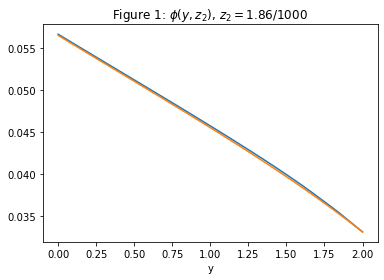

In [20]:
check = np.load('check_2d.npy')
plt.plot(y_grid_short, ϕ_grid[25])
plt.plot(y_grid_short, check[25])
plt.title(r'Figure 1: $\phi(y, z_2)$, $z_2=1.86/1000$')
plt.xlabel('y')
# plt.savefig('figure.pdf')